In [1]:
import pandas as pd

commits_df = pd.read_csv('commits.csv')
contributor_df = pd.read_csv('contributor_work_period.csv')


In [2]:
# Tính số lượng commits theo thời gian
commits_over_time = commits_df.groupby(pd.to_datetime(commits_df['Commited Date']).dt.to_period('M')).size()

# Tính số lượng contributors theo thời gian
contributors_over_time = contributor_df.groupby(pd.to_datetime(contributor_df['First Commit']).dt.to_period('M')).size()


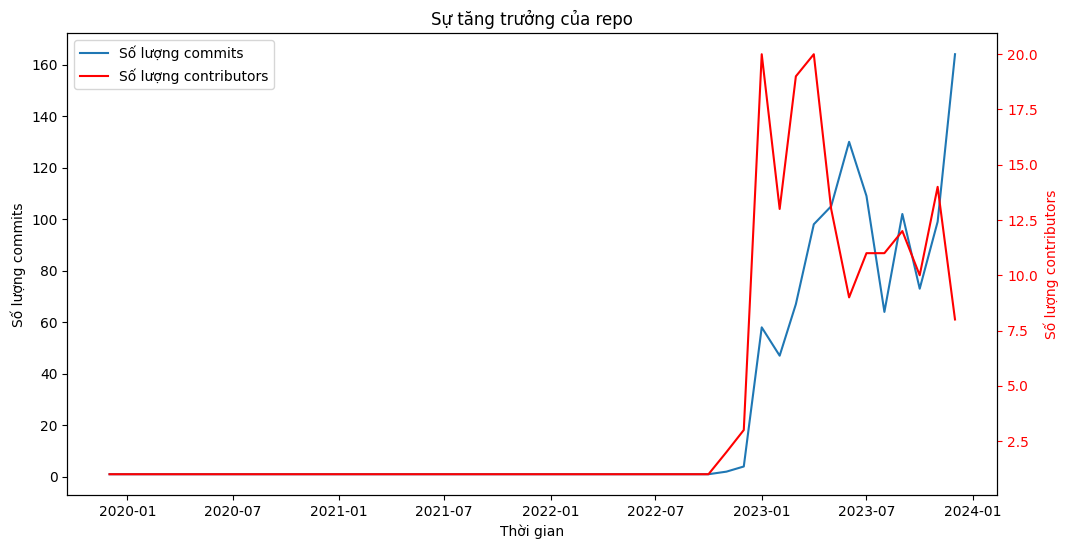

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

commits_df = pd.read_csv('commits.csv')
contributor_df = pd.read_csv('contributor_work_period.csv')

# Tính số lượng commits theo thời gian
commits_over_time = commits_df.groupby(pd.to_datetime(commits_df['Commited Date']).dt.to_period('M')).size()

# Tính số lượng contributors theo thời gian
contributors_over_time = contributor_df.groupby(pd.to_datetime(contributor_df['First Commit']).dt.to_period('M')).size()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Convert the Period index to a datetime-like format
ax1.plot(commits_over_time.index.to_timestamp(), commits_over_time, label='Số lượng commits')
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Số lượng commits')
ax1.set_title('Sự tăng trưởng của repo')

ax2 = ax1.twinx()
ax2.plot(contributors_over_time.index.to_timestamp(), contributors_over_time, color='r', label='Số lượng contributors')
ax2.set_ylabel('Số lượng contributors', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()
